In [156]:
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
# Load datasets
source="./airbnb_data/"
calendar=pd.read_csv(source+"calendar.csv")
demographics=pd.read_csv(source+"demographics.csv")
econ_state=pd.read_csv(source+"econ_state.csv")
listings=pd.read_csv(source+"listings.csv")
real_estate=pd.read_csv(source+"real_estate.csv")
venues=pd.read_csv(source+"venues.csv")

In [139]:
econ_state.head()

,state,2005Q1_gdp,2005Q2_gdp,2005Q3_gdp,2005Q4_gdp,2006Q1_gdp,2006Q2_gdp,2006Q3_gdp,2006Q4_gdp,2007Q1_gdp,...,2016/03_ur,2016/04_ur,2016/05_ur,2016/06_ur,2016/07_ur,2016/08_ur,2016/09_ur,2016/10_ur,2016/11_ur,2016/12_ur
0,AL,153332,155940,157437,160293,161934,163974,165470,166495,166821,...,6.6,6.6,6.6,6.7,6.7,6.7,6.6,6.6,6.6,6.6
1,AK,37517,38907,40691,43138,42872,44653,45349,45840,46658,...,5.9,5.8,5.8,5.8,5.8,5.9,6.0,6.1,6.2,6.3
2,AZ,218206,224496,231629,235099,241787,244659,250886,256505,258078,...,4.1,4.1,4.1,4.1,4.0,4.0,4.0,4.0,4.0,3.9
3,AR,88446,89264,90515,93050,93413,95259,95481,95203,94289,...,5.5,5.4,5.3,5.3,5.2,5.1,5.1,5.0,5.0,5.0
4,CA,1722091,1747827,1787427,1809426,1857944,1865835,1886549,1907754,1915172,...,5.6,5.5,5.5,5.5,5.4,5.4,5.3,5.3,5.3,5.2


In [140]:
econ_state_t = econ_state.transpose()
econ_state_t.columns = econ_state_t.iloc[0]
econ_state_t = econ_state_t.iloc[1:]
econ_state_t = econ_state_t.reset_index()
econ_state_t.rename(columns={'index':'Indicator'}, inplace=True)
econ_state_t.head()

state,Indicator,AL,AK,AZ,AR,CA,CO,CT,DE,DC,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
0,2005Q1_gdp,153332,37517,218206,88446,1722091,216906,207262,52121,82522,...,30851,223795,960570,90903,23276,349134,290007,51722,223206,25586
1,2005Q2_gdp,155940,38907,224496,89264,1747827,218710,210134,51156,83530,...,30828,224899,970290,92512,23371,356828,295759,53033,224820,26992
2,2005Q3_gdp,157437,40691,231629,90515,1787427,222780,210233,51480,83845,...,31474,229409,998029,95443,23584,364188,296253,53825,229139,27684
3,2005Q4_gdp,160293,43138,235099,93050,1809426,223421,213052,58232,84446,...,32368,231917,1031329,99043,23924,366941,303593,55234,228133,29556
4,2006Q1_gdp,161934,42872,241787,93413,1857944,229476,221025,55333,86260,...,31931,235324,1058764,102201,24217,376028,310192,55802,232421,30619


In [141]:
econ_state_t['Date'] = econ_state_t['Indicator'].str.split('_').str[0]
econ_state_t['Indicator'] = econ_state_t['Indicator'].str.split('_').str[1]
econ_state_t.head()

state,Indicator,AL,AK,AZ,AR,CA,CO,CT,DE,DC,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,Date
0,gdp,153332,37517,218206,88446,1722091,216906,207262,52121,82522,...,223795,960570,90903,23276,349134,290007,51722,223206,25586,2005Q1
1,gdp,155940,38907,224496,89264,1747827,218710,210134,51156,83530,...,224899,970290,92512,23371,356828,295759,53033,224820,26992,2005Q2
2,gdp,157437,40691,231629,90515,1787427,222780,210233,51480,83845,...,229409,998029,95443,23584,364188,296253,53825,229139,27684,2005Q3
3,gdp,160293,43138,235099,93050,1809426,223421,213052,58232,84446,...,231917,1031329,99043,23924,366941,303593,55234,228133,29556,2005Q4
4,gdp,161934,42872,241787,93413,1857944,229476,221025,55333,86260,...,235324,1058764,102201,24217,376028,310192,55802,232421,30619,2006Q1


In [142]:
#econ_state_t['Indicator'].unique().tolist()
gdp = econ_state_t[econ_state_t['Indicator']=='gdp']
income = econ_state_t[econ_state_t['Indicator']=='personal']
unemp = econ_state_t[econ_state_t['Indicator']=='ur']

# Drop first column 'Indicator' and reorder columns to bring date column to start i.e. column index 0
def reordercol(data):
    data = data.drop('Indicator', axis=1)
    cols = data.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    return data[cols]

gdp = reordercol(gdp)
income = reordercol(income)
unemp = reordercol(unemp)

In [144]:
def splitdate(data, time_unit, split_by):
    data['Year'] = data['Date'].str[:4]
    data[time_unit] = data['Date'].str[split_by:]
    data = data.drop('Date',axis=1)
    data[['Year', time_unit]] = data[['Year', time_unit]].apply(pd.to_numeric)
    return data

gdp = splitdate(gdp, 'Quarter', -1)
income = splitdate(income, 'Quarter', -1)
unemp = splitdate(unemp, 'Month', -2)

In [162]:
ny_gdp = gdp[['NY','Year','Quarter']]
ny_income = income[['NY','Year','Quarter']]
ny_unemp = unemp[['NY','Year','Month']]

In [163]:
ny_gdp.head()

state,NY,Year,Quarter
0,996072,2005,1
1,1017192,2005,2
2,1031009,2005,3
3,1049458,2005,4
4,1070271,2006,1


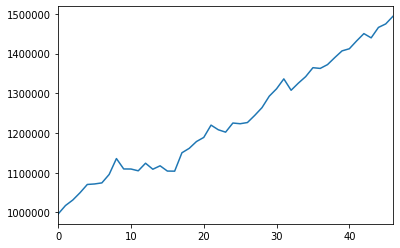

In [165]:
ny_gdp['NY'].plot()
plt.show()

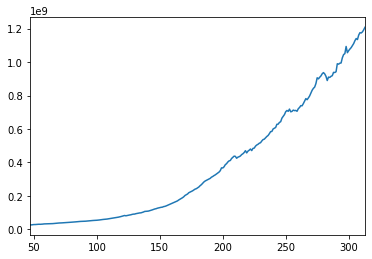

In [166]:
ny_income['NY'].plot()
plt.show()

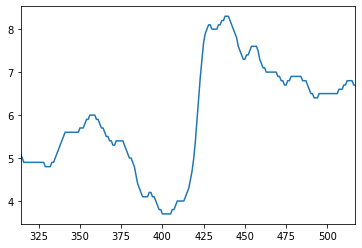

In [167]:
ny_unemp['NY'].plot()
plt.show()

## Listings data

In [170]:
calendar.head()

,listing_id,date,available,price,metro_area
0,2515,2018-03-05,t,69.0,NYC
1,2515,2018-03-04,t,69.0,NYC
2,2515,2018-03-03,t,69.0,NYC
3,2515,2018-03-02,t,69.0,NYC
4,2515,2018-03-01,t,69.0,NYC


In [192]:
#calendar['metro_area'].unique().tolist()
ny_calendar = calendar[calendar['metro_area']=='NYC']
ny_calendar = ny_calendar.drop(['metro_area','available'], axis=1)
ny_calendar.head()

,listing_id,date,price
0,2515,2018-03-05,69.0
1,2515,2018-03-04,69.0
2,2515,2018-03-03,69.0
3,2515,2018-03-02,69.0
4,2515,2018-03-01,69.0


In [ ]:
ny_calendar['date'] = pd.to_datetime(ny_calendar.date)
ny_calendar['date_mean'] = ny_calendar.groupby(ny_calendar.date.dt.day)['price'].transform('mean')
ny_cal_mean = ny_calendar['date'] + ny_cal_mean.to_frame()
ny_cal_mean